#  Linear Regression

## Lab Assignment - Ocean Salinity Prediction

The temp_salinity.csv file contains data of ocean, its temperature and salinity. We have to predict the salinity of the water based on its temperature. 

Perform regression analysis on the data, and answer the following questions.

#### 1. Plot a scatter plot of temp vs salinity. What is the relationship between them? 
#### 2. Calculate mean and standard deviation of salinity. Find out outliers(value greater than 2 standard deviations) in your data. List them down. 
#### 3. Filter out rows in your dataset, whose price is greater than 2 standard deviations. Plot a scatter of temp vs salinity, with outliers in a different color.
#### 4. Now split your filtered data with a 75:25 ratio using the train_test_split function. Perform linear regression with the training dataset. Plot the line of regression with the training data set. 
#### 5. Predict the output with the test data set. Find out the MSE, R^2 score. Plot a scatter of test output vs obtained output. 
#### 6. Perform another split of 80:20, and repeat steps 4 & 5. Which training yields a better score, Justify. 
#### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./datasets/temp_salinity.csv')
df.head()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


#### 1. Plot a scatter plot of temp vs salinity. What is the relationship between them? 

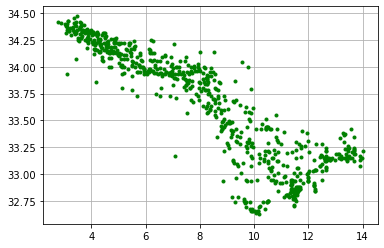

In [4]:
import matplotlib.pyplot as plt

temp = df['T_degC']
sal = df['Salnty']

plt.figure()
plt.plot(temp,sal,'g.')
plt.grid(True)

There is a linear relationship between temperature and salinity.

#### 2. Calculate mean and standard deviation of salinity. Find out outliers(value greater than 2 standard deviations) in your data. List them down. 

In [ ]:
print("Mean value of salinity is %0.2f"%(sal.mean()))
print("Standard deviation of salinity is %0.2f"%(sal.std()))
df['out'] = abs(sal - sal.mean())
print(df.shape)
print(df.head())
dfout = df[df['out'] >= 0.1*sal.mean()]
print(dfout.shape)
print(dfout)

#### 3. Filter out rows in your dataset, whose price is greater than 2 standard deviations. Plot a scatter of temp vs salinity, with outliers in a different color.


#### 4. Now split your filtered data with a 75:25 ratio using the train_test_split function. Perform linear regression with the training dataset. Plot the line of regression with the training data set. 
 

In [5]:
print(df.shape)
df2 = df.dropna()
print(df2.shape)
temp = df2['T_degC']
sal = df2['Salnty']

(750, 2)
(725, 2)


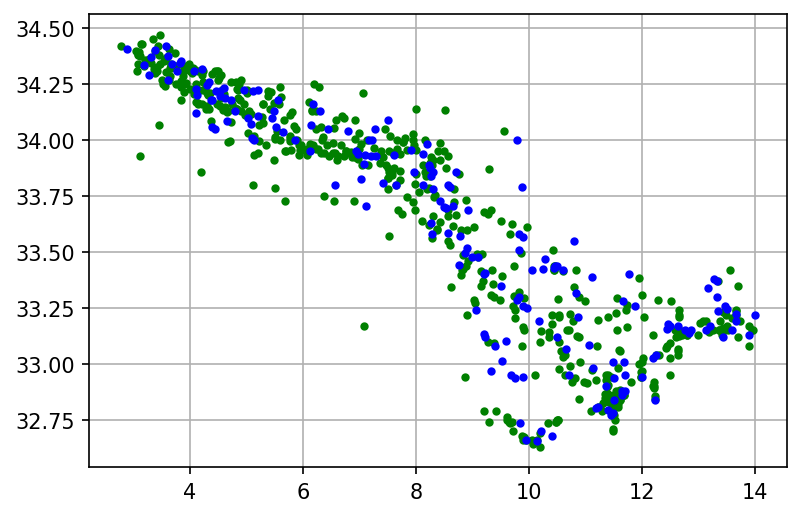

In [7]:
from sklearn.model_selection import train_test_split

temp_train, temp_test, sal_train, sal_test = train_test_split(temp, sal, test_size=0.25)

plt.figure(dpi=150)
plt.plot(temp_train, sal_train, 'g.')
plt.plot(temp_test,sal_test,'b.')
plt.axis()
plt.grid(True)

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Create and fit the model
model = LinearRegression()
x = np.array(temp_train).reshape(-1,1)
model.fit(x, sal_train)

# print(sal_test)           ## Test output - Expected Output
xtest = np.array(temp_test).reshape(-1,1)
# print(model.predict(xtest))

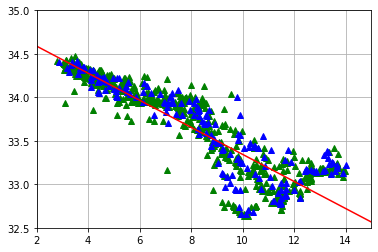

In [19]:
plt.figure()
plt.plot(temp_train, sal_train,'g^')
plt.plot(temp_test,sal_test,'b^')
plt.axis([2,15,32.5,35])
plt.grid(True)

# Plot Regression Solution line
plt.plot([0, 25], [model.predict([[0]])[0],model.predict([[25]])[0]], color='r')

In [ ]:
# from sklearn.linear_model import LinearRegression

# # Create and fit the model
# model = LinearRegression()
# model.fit(np.array(temp_train).reshape(-1,1), sal_train)

#### 5. Predict the output with the test data set. Find out the MSE, R^2 score. Plot a scatter of test output vs obtained output. 

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(sal, model.predict(np.array(temp).reshape(-1,1)),multioutput = 'uniform_average')
# multioutput defines weights used to average errors

print("SGD MSE is ", mse)

SGD MSE is  0.05744473988316131


In [15]:
print(model.score(np.array(temp).reshape(-1,1),sal)) # R2 coefficient

0.7934344716793782


#### 6. Perform another split of 80:20, and repeat steps 4 & 5. Which training yields a better score, Justify. 


#### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k.